# Semana 3 - Teste de Hipótese e Previsão de Resposta

**Hipótese Nula H<sub>0</sub>**: Assumir β<sub>1</sub> = 0 -> denominado de β<sub>10</sub>

**Valor Estatística do Teste**:
$$
\boxed{\displaystyle t=\frac{\widehat{\beta}_1-\beta_{10}}{s_{\widehat{\beta}_1}}}
$$
**Teste de Utilidade**: realizado testes com $\beta_1 = 0$ e $\beta_1 \not = 0$
> Quando $\beta_1 = 0$ for verdadeiro, a variável Y independe de X, portanto o modelo de regressão linear não é aplicável
>
> Quando $\beta_1 = 0$ for falso, n é suficientemente grande, calcular r² para identificar se o modelo de regressão linear explica a relação das variáveis aleatórias investigadas.

**Estatística de Teste:** Assume uma distribuição do tipo t de Student, com graus de liberdade = $n-2$
$$
\boxed{t = \frac{\beta_1}{S_{\beta_1}}}
$$
Sendo que:

HIPOTESE ALTERNATIVA|DETERMINAÇÃO DO VALOR DE P|
--------------------|--------------------------
$H_\alpha:\beta_1>\beta_{10}$|Área sob a curva $t_{n-2}$ à direita de t
$H_\alpha:\beta_1<\beta_{10}$|Área sob a curva $t_{n-2}$ à esquerda de t
$H_\alpha:\beta_1\not =\beta_{10}$|2.(Área soba a curtva $t_{n-2}$ à direita de $\vert t \vert$

## Mas quem é p?

O valor de p é a probabilidade de observar um valor tão extremo quanto obtido, assumindo $H_0$ como verdadeira. Dado que assumimos esse valor como $\beta_1 = 0$, indicando que a variável y é independente de X.
Quando p assume um valor proximo de 1, há uma possibilidade maior de ocorrer tal evento, logo podemos inferir que y independe de x.
Quando p assume um valor bem proximo de 0, entendemos que a probabilidade de apresentar um vaor tão extremo é quase 0, reforçando a dependência de y por x.


1. Exercício: estudo de scooters

x = velocidade de teste de circuito (km/h)

y = velocidade do teste de rolamento


x = [
    42.2, 42.6, 43.3, 43.5, 43.7, 44.1, 44.9, 45.3, 45.7,
    45.7, 45.9, 46.0, 46.2, 46.2, 46.8, 46.8, 47.1, 47.2
]

y = [
    44, 44, 44, 45, 45, 46, 46, 46, 47,
    48, 48, 48, 47, 48, 48, 49, 49, 49
]

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import math

In [3]:
x = [42.2, 42.6, 43.3, 43.5, 43.7, 44.1, 44.9, 45.3, 45.7, 45.7, 45.9, 46.0, 46.2, 46.2, 46.8, 46.8, 47.1, 47.2]
y = [44, 44, 44, 45, 45, 46, 46, 46, 47,48, 48, 48, 47, 48, 48, 49, 49, 49]

x = np.array(x)
y = np.array(y)

dfScooter = pd.DataFrame({'Circuito':x,
                          'Rolamento':y})
print(dfScooter)

    Circuito  Rolamento
0       42.2         44
1       42.6         44
2       43.3         44
3       43.5         45
4       43.7         45
5       44.1         46
6       44.9         46
7       45.3         46
8       45.7         47
9       45.7         48
10      45.9         48
11      46.0         48
12      46.2         47
13      46.2         48
14      46.8         48
15      46.8         49
16      47.1         49
17      47.2         49


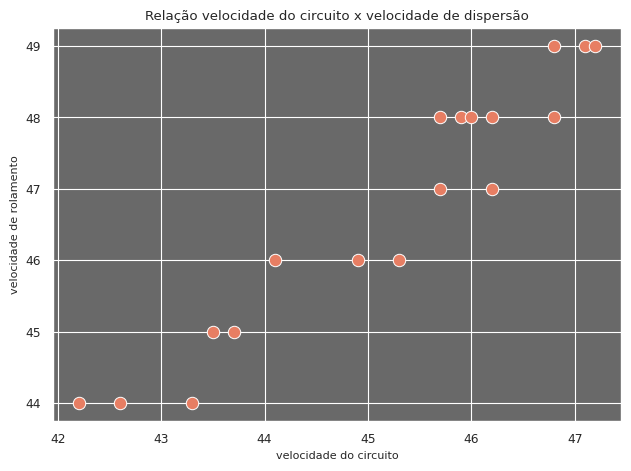

In [4]:
#plotando o gráfico de dispersão - uso de seaborn
sns.set_style("darkgrid",{"axes.facecolor": "#696969"})
sns.set_palette("flare",4)
sns.set_context("paper")
sns.scatterplot(data=dfScooter,x=x,y=y,s=80)

plt.title('Relação velocidade do circuito x velocidade de dispersão')
plt.xlabel('velocidade do circuito',fontsize=8)
plt.ylabel('velocidade de rolamento',fontsize=8)

plt.tight_layout()

In [5]:
#calculando r²
n=len(x)
somax = np.sum(x)
somay=np.sum(y)
somaxx=np.sum(x**2)
somayy=np.sum(y**2)
somaxy=sum(x*y)
sxx= somaxx-somax**2/n
sxy=somaxy-somax*somay/n
syy=somayy-somay**2/n
beta1 = sxy/sxx
beta0 = np.average(y)-beta1*np.average(x)
sqe = syy-beta1*sxy
r2= 1- sqe/syy


print(r2,sqe, beta1)

0.9233180826203335 4.111002792854215 1.0834167676661584


In [6]:
#Teste de utitilidade do modelo no nível de significancia α = 0.001
#calcular a variancia da estimativa de beta 1
import math

#para calcular a variância do estimador de beta 1 primeiro, devemos calcular a variancia do erro

varErro = sqe/(n-2)
dpErro = math.sqrt(varErro)
dpBeta1 = dpErro/math.sqrt(sxx)

#calculando o t

t_obtido= beta1/dpBeta1


print(f' variancia de beta  ={dpBeta1}\n valor de t={t_obtido}  ')


 variancia de beta  =0.07805601450282426
 valor de t=13.879990857424032  


In [7]:
# calculando agora o valor de p p = 2.area à direita de t
#área a direita de t
gl=n-2
p_direita = t.sf(t_obtido,gl)
valorp = 2*p_direita

print(f'Valor de P = {round(valorp)}, portanto há confirmação de utilidade do modelo de regressão linear simples.' )

Valor de P = 0, portanto há confirmação de utilidade do modelo de regressão linear simples.


# Tabela ANOVA

ANOVA, no contexto da regressão linear, é uma tabela que, a partir da relação entre os “acertos” do modelo (variação explicada pela regressão – SQR) e os “erros” do modelo (variação residual – SQE), avalia se a proporção de variação explicada é suficientemente grande para concluir que existe uma relação linear significativa entre as variáveis. Essa comparação é feita por meio do teste F.

$$\boxed{F = t²}$$


## Inferências sobre $\mu_{y,x*}$ e a previsão de Y futuros

### Proposição

Seja $\hat{Y}=\hat{\beta_0}+\hat{\beta_1}x*$, em que x* é um valor fixo de x. Então:
1. O valor médio de $\hat{Y}$ é:
$$
\boxed{E(\hat{y}) = E(\hat{\beta_0}+\hat{\beta_1}x*)= \mu_{\hat{\beta_0}+\hat{\beta_1}} = {\beta_0}+{\beta_1}x*}
$$
onde $\alpha^2$ equivale a variancia dos erro

2. A variância de $\hat{Y}$ é:
$$
\boxed{
  V(\hat{Y})=\sigma^2_{\hat{Y}}=\sigma^2\Big[\frac{1}{n} + \frac{(x*-\overline{x})^2}{S_xx}\Big]}
  $$
>Estamos falando de quanto o próprio processo de estimar
$\beta_0$ e $\beta_1$ faz com que as previsões variem de amostra para amostra.
> $\boxed{\sigma^2 = \frac{sqe}{n-2}}$


3. Desvio Padrão estimado de $\hat{\beta_0}+\hat{\beta_1}x*$, representado por $s_{\hat{y}}$ ou $s_{\hat{\beta_0}+\hat{\beta_1}x*}$, resulta da substituição da variância pela sua estimativa:
$$
  \boxed{
s_{\hat{y}} = s_{\hat{\beta_0} + \hat{\beta_1}x^*}
= s \sqrt{ \frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}} }}
$$
3. $\hat{Y}$ tem uma distribuição normal.


O estimador de $\mu_{Y,x^*}$ é mais preciso quando $x^*$ está próximo ao centro de $x_1$ $\therefore$ IC e IP são mais estreitos para $x^*$ próximo a $\overline{x}$.

### Inferências sobre $\mu_{Yxx^*}$

$$
\boxed{
T = \frac{\hat{\beta_0} + \hat{\beta_1}x^* - (\beta_0 + \beta_1 x^*)}
     {s_{\hat{\beta_0} + \hat{\beta_1}x^*}}
= \frac{\hat{Y} - (\beta_0 + \beta_1 x^*)}
       {s_{\hat{y}}}}
$$

### Intervalo de Confiança IC

IC de 100 $(1-\alpha)\%$ para $\mu_{Y.x^*}$, o valor esperado de Y quando $x=x^*$, é:
$$
\boxed{
  \hat{\beta_0
  } + \hat{\beta_1}x^* \mp
  t_{\alpha/2,n-2}\cdot s_{\beta_0 + \beta_1 x^*} =
  \hat{y} \mp t_{\alpha/2,n-2}}
$$

> Intervalos de Confiança estreitos denotam que dispomos de informações razoavelmente precisas. Haverá mudanças do intervalo de acordo com o valor de x adotado, quanto mais próximo a média mais estreito ele será .


2. Exercício 2

Estudo de carbonatação para identificar danos em estrutura de concreto.

> x= profundidade de carbonatação em mm
>
> y= resitência (MPa)de uma amostra de concreto

In [8]:
# Dados fornecidos
x = [8.0, 15.0, 16.5, 20.0, 20.0, 27.5, 30.0, 30.0, 35.0,38.0, 40.0, 45.0, 50.0, 50.0, 55.0, 55.0, 59.0, 65.0]

y = [22.8, 27.2, 23.7, 17.1, 21.5, 18.6, 16.1, 23.4, 13.4,19.5, 12.4, 13.2, 11.4, 10.3, 14.1, 9.7, 12.0, 6.8]

x= np.array(x)
y = np.array(y)

df_concreto = pd.DataFrame({'Carbonatação':x,
                            'Resistência':y})
print(df_concreto)

    Carbonatação  Resistência
0            8.0         22.8
1           15.0         27.2
2           16.5         23.7
3           20.0         17.1
4           20.0         21.5
5           27.5         18.6
6           30.0         16.1
7           30.0         23.4
8           35.0         13.4
9           38.0         19.5
10          40.0         12.4
11          45.0         13.2
12          50.0         11.4
13          50.0         10.3
14          55.0         14.1
15          55.0          9.7
16          59.0         12.0
17          65.0          6.8


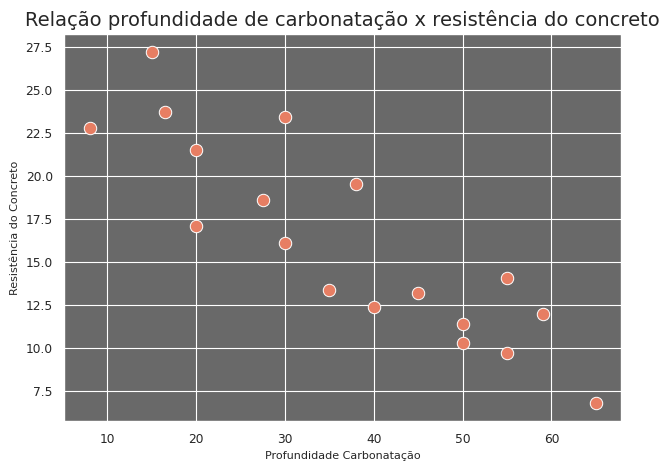

In [9]:
# Plot do gráfico
sns.set_style("darkgrid",{"axes.facecolor": "#696969"})
sns.set_palette("flare",4)
sns.set_context("paper")
sns.scatterplot(data=dfScooter,x=x,y=y,s=80)

plt.title('Relação profundidade de carbonatação x resistência do concreto', fontsize=14)
plt.xlabel('Profundidade Carbonatação',fontsize=8)
plt.ylabel('Resistência do Concreto',fontsize=8)

plt.tight_layout()


In [10]:
#Primeiras relações
n = len(x)
gl=n-2
somax = np.sum(x)
somaxx = np.sum(x**2)
somay = np.sum(y)
somayy = np.sum(y**2)
somaxy = np.sum(x*y)
Sxx = somaxx - somax**2/n
Sxy = somaxy - somax*somay/n
Syy = somayy - somay**2/n
beta1 = Sxy/Sxx
beta0 = np.average(y) - np.average(x)*beta1


print(f'Reta dos quadrados mínimos: Y = {beta0} + {beta1}')
print(f'n = {n}\nsomaX = {somax}\nsomaXX = {somaxx}\nsomaY= {somay}')
print(f'SomaYY = {somayy}\nsomaXY = {somaxy}\nSxx = {Sxx}\nSyy = {Syy}\nSxy = {Sxy}\nbeta1 = {beta1}\nbeta0 = {beta0}')

Reta dos quadrados mínimos: Y = 27.18293605251681 + -0.29756122753460174
n = 18
somaX = 659.0
somaXX = 28967.5
somaY= 293.2
SomaYY = 5335.76
somaXY = 9293.95
Sxx = 4840.777777777777
Syy = 559.8577777777782
Sxy = -1440.427777777777
beta1 = -0.29756122753460174
beta0 = 27.18293605251681


In [14]:
# Calculando o IC de 95% quand x = 45
alpha = 0.05
X=45
#determinar o valor esperado y para x = 45
Y = beta0 + beta1*X

print(f'Valor esperado para y = {Y}')

#Calculando SQE

sqe = Syy - beta1*Sxy

# Calculando a viriancia do estimador de y

varErros = sqe/(n-2)
dpErros = math.sqrt(varErros)
print(dpErros)
mediax = np.average(x)

print(mediax)
varY = varErros*(1/n + ((X-mediax)**2)/Sxx)
dpY = math.sqrt(varY)
print(varY,dpY)

#calcular o t crítico, para buscar a probabilidade da tabela de T de student
t_critico = t.ppf(1-alpha/2,(n-2))
print(t_critico)

#definindo o intervalo de confiança
maiorY = Y+(t_critico*dpY)
menorY = Y-(t_critico*dpY)

print(f'o Intervalo de confiança para x = 45 é entre {menorY} - {maiorY}')

Valor esperado para y = 13.79268081345973
2.8640260129676323
36.611111111111114
0.57494955305104 0.7582542799424478
2.1199052992210112
o Intervalo de confiança para x = 45 é entre 12.185253547252724 - 15.400108079666737


In [19]:
# Calculando o IC para x = 35
X2 = 35
Y2 = beta0 + beta1 * X2
varY2= varErros*(1/n+(X2-mediax)**2/Sxx)
dpY2 = math.sqrt(varY2)

t2_critico = t.ppf(1-alpha/2, n-2)

maiorY2 = Y2+ t2_critico*dpY2
menorY2 = Y2 - t2_critico*dpY2

print(f'o Intervalo de confiança para x = 35 é entre {menorY2} - {maiorY2}')

o Intervalo de confiança para x = 35 é entre 15.33034576054373 - 18.206240417067768


## Intervalo de confiança entre duas variáveis

Nesse caso o IC no par de intervalos resultantes é de $100(1-2\alpha)\%$ isso porque não se trata de duas variáveis independetes, uma vez que todo valor de x dependerá de $\beta_0, \beta_1 e S$

Para esses conjuntos de $k$ valores de x é usado **desigualdade de Bonferroni**
$$
\boxed{
IC garantido em ser pelo menos 100(1-k\alpha)\%
}$$



## Intervalo de previsão para um valor futuro de $Y$

> Intervalo de previsão é um intervalo de valores possíveis para Y, assemelha-se a ideia do Intervalo de Confiança, mas dialoga com valores ainda não observados na amostra analisada. Nesse caso o $Y$ não é um parâmetro e sim uma variável aleatória.

A incerteza da previsão é maior que na estimativa, dessa forma o IP será sempre maior que o IC.

### VARIÂNCIA DO ERRO DE PREVISÃO
$$
\boxed{V[Y-(\hat{\beta_1}+\hat{\beta_1}*x)]\\ =
V(Y)+V(\hat{\beta_0}+\hat{\beta_1}*x)\\=
\sigma^2 +\sigma^2[\frac{1}{n}+\frac{(x^*-\overline{x})^2}{S+{xx}}]\\=
\sigma^2[1+\frac{1}{n}+\frac{(x^*-\overline{x})^2}{S_{xx}}]
}$$

### ENCONTRANDO VALORES LIMITES DE UM INTERVALO DE PREVISÃO

1. ENCONTRAR O T

$$
\boxed{
T = \frac{Y - (\hat{\beta}_0 + \hat{\beta}_1 x^*)}
{s \cdot \sqrt{1 + \frac{1}{n} + \frac{(x^* - \overline{x})^2}{S_{xx}}}}
}
$$

2. SUBSTITUIR O T NA DESIGUALDADE
 Um IP de 100$(1-\alpha)\%$/:

$$
\boxed{
  \hat{\beta_0} + \hat{\beta_1} x^*
  \mp t_{\alpha/2,n-2}. s\sqrt{1 + \frac{1}{n}+ \frac{(x^*- \overline{x}^2)}{S_{xx}} }\\
    =\hat{\beta_0} + \hat{\beta_1} x^* ∓ t_{\alpha/2,n-2}.\sqrt{s^2+s^2_{\hat{\beta_0}+\hat{\beta_1}x^*}}\\
    = \hat{y} \mp t_{\alpha / 2, (n-2)}.\sqrt{s^2-S_{\hat{Y}}^2}
  }
$$

> Quando o $n→ ∞$, oa larguda do IC tende a 0, o mesmo não ocorre em relação ao IP, pois ainda que n maiores apriomore a asservitividade da previsão, ainda assim mantemos a incerteza da previsão.

> Ao aplicar a técnica de Bonferroni, se um IP de 100 $(1-\alpha)\%$ para k diferentes valores de x, o intervalo de precisão será pelo menos 100 $(1-k\alpha)\%$


In [25]:
## Calculando o Intervalo de Previsão de 95% em cima dos dados do carbonatação-resistência.
# Resgatando dados
print(f'valor esperado Y(45) {Y}\n t= {t_critico:.3f}\n s = {dpErros}\n sᵧ = {dpY}')

valor esperado Y(45) 13.79268081345973
 t= 2.120
 s = 2.8640260129676323
 sᵧ = 0.7582542799424478


In [40]:
#substituindo os dados
IPmaior = Y+t_critico*(math.sqrt((dpErros**2)+(dpY**2)))
IPmenor = Y-t_critico*(math.sqrt((dpErros**2)+(dpY**2)))
print(f'IP = ({IPmenor:.3f},{IPmaior:.3f})')

IP = (7.512,20.073)
